# 粒子群算法

## 写在前面

粒子群优化算法(Particle swarm optimization, PSO) 是一种进化计算技术（evolutionary computation）。该算法源于对鸟群捕食的行为研究。粒子群优化算法的基本思想：是通过群体中个体之间的协作和信息共享来寻找最优解。

鸟被抽象为没有质量和体积的微粒(点)，并延伸到N维空间，粒子i在N维空间的位置表示为矢量Xi＝(x1，x2，…，xN)，飞行速度表示为矢量Vi＝(v1，v2，…，vN)。

每个粒子都可以看作问题的一个潜在最优解，用位置、速度和适应度值这三项指标来表征一个粒子。每个粒子都有一个由目标函数决定的适应值(fitness value)，并且知道自己到目前为止发现的最好位置(pBestPos)和现在的位置Xi。这个可以看作是粒子自己的飞行经验。除此之外，每个粒子还知道到目前为止整个群体中所有粒子发现的最好位置(gBestPos)(gBestPos是pBestPos中的最好值)，这个可以看作是粒子同伴的经验。粒子就是通过自己的经验和同伴中最好的经验来决定下一步的运动。 

标准PSO算法的流程：

     1）初始化一群粒子(群体规模为N)，包括随机位置和速度；
     2）评价每个粒子的适应度；
     3）对每个粒子，将其适应值与其经过的最好位置pBestPos作比较，如果较好，则将其作为当前的最好位置pBestPos；
     4）对每个粒子，将其适应值与其经过的最好位置gBestPos作比较，如果较好，则将其作为当前的最好位置gBestPos；
     5）根据公式(2)、(3)调整粒子速度和位置；
     6）未达到结束条件则转第2）步。

In [141]:
import numpy as np
import math
import matplotlib.pyplot as plt

### 1.1 PSO算法参数设置

In [142]:
# 惯性权重：w
w0 = 0.9

# 学习因子或加速因子：lr
lr = (0.49445,1.49445)

# 最大迭代次数：maxgen
maxgen = 300

# 种群规模：n 
n = 50

# 粒子的位置和速度的最大最小值：rangePos, rangeV
rangePos = (-2*math.pi , 2*math.pi)
rangeV = (-0.5,0.5)

### 1.2 种群初始化

In [143]:
# 适应度函数
def func(x):
    # x输入粒子位置
    # y 粒子适应度值
    if (x[0]==0)&(x[1]==0):
        y = np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    else:
        y = np.sin(np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)+np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
    return y

In [144]:
pos = np.zeros((n,2))
v = np.zeros((n,2))
fitness = np.zeros(n)

for i in range(n):
    pos[i] = [(np.random.rand()-0.5)*rangePos[0]*2,(np.random.rand()-0.5)*rangePos[1]*2]
    v[i] = [(np.random.rand()-0.5)*rangePos[0]*2,(np.random.rand()-0.5)*rangePos[1]*2]
    fitness[i] = func(pos[i])

### 1.3 寻找初始极值

In [145]:
# 群体最优的粒子位置及其适应度值
gBestPos, gBestFitness = pos[fitness.argmax()].copy(), fitness.max()
# 粒子的最优位置及其适应度值
pBestPos, pBestFitness = pos.copy(), fitness.copy()

### 1.4 迭代寻优

In [146]:
result = np.zeros(maxgen)

In [147]:
for i in range(maxgen):
#     w = w0 # 恒定惯性权重
#     w = w0 - 0.4*i/maxgen  #线性递减惯性权重
    w = w0 - 0.4*(i/maxgen)**2 #递减惯性权重
#     w = w0 - 0.4*(2*i/maxgen - (i/maxgen)**2) #递减惯性权重

    #速度更新
    for j in range(n):
        v[j] = w*v[j] + lr[0]*np.random.rand()*(pBestPos[j]-pos[j])+lr[1]*np.random.rand()*(gBestPos-pos[j])
    v[v<rangeV[0]] = rangeV[0]
    v[v>rangeV[1]] = rangeV[1]

    #粒子位置更新
    for j in range(n):
        pos[j] += v[j]
    pos[pos<rangePos[0]] = rangePos[0]
    pos[pos>rangePos[1]] = rangePos[1]

    #适应度更新
    for j in range(n):
        fitness[j] = func(pos[j])

    for j in range(n):
        if fitness[j] > pBestFitness[j]:
            pBestFitness[j] = fitness[j]
            pBestPos[j] = pos[j].copy()

    if pBestFitness.max() > gBestFitness:
        gBestFitness = pBestFitness.max()
        gBestPos = pos[pBestFitness.argmax()].copy()

    result[i] = gBestFitness

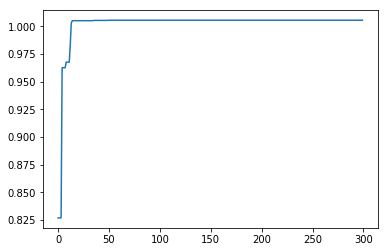

In [148]:
plt.plot(result[:300])
plt.show()

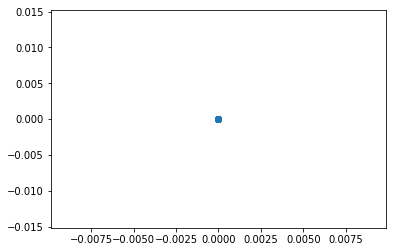

In [149]:
plt.scatter(pos[:,0],pos[:,1])

In [150]:
gBestFitness,pBestFitness.max(axis=0),gBestPos

(1.0053918284590453,
 1.0053918284590453,
 array([3.64124891e-10, 7.39920213e-10]))